## Heart Disease Prediction with Logistic Regression
World Health Organization has estimated that four out of five cardiovascular diseases(CVD) deaths are due to heart attacks. This whole research intends to pinpoint the ratio of patients who possess a good chance of being affected by CVD and also to predict the overall risk using Logistic Regression.

In [19]:
# Import the libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

In [22]:
data = pd.read_csv("framingham.csv")
data.drop(['education'], inplace = True, axis = 1)
data.rename(columns = {'male' : 'sex_male'}, inplace = True)

# removing NaN / Null values
data.dropna(axis = 0, inplace = True)
print(data.head())

   sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [23]:
print(data.shape)

(3749, 15)


The shape is a tuple of integers. These numbers denote the lengths of the corresponding array dimension. In other words: The "shape" of an array is a tuple with the number of elements per axis (dimension). In our example, the shape is equal to (3749, 15), i.e. we have 3749 lines and 15 columns.

In [24]:
print(data.TenYearCHD.value_counts())

0    3177
1     572
Name: TenYearCHD, dtype: int64


0: Denotes the patients not affected by Heart Disease in 10 years
1: Denotes the patients has affected by Heart Disease in 10 years

Here we have 3177 patients who werent affected while 527 patients who were affected by the Heart Disease.

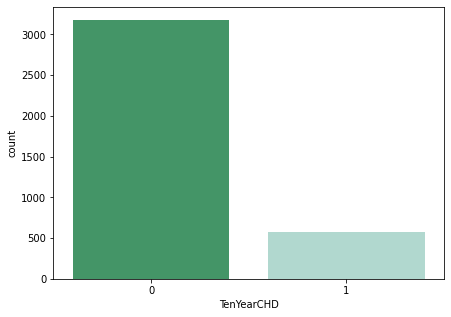

In [ ]:
# Counting no. of patients affected with CHD
plt.figure(figsize= (7, 5))
sn.countplot(x = 'TenYearCHD', data = data, palette= "BuGn_r")
plt.show()

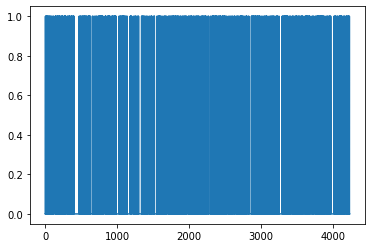

In [30]:
# Plot all the patients who were affected anot not affected
laste = data['TenYearCHD'].plot()
plt.show(laste)

In [ ]:
X = np.asarray(data[['age', 'sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
y = np.asarray(data['TenYearCHD'])
 
# normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
 
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2624, 6) (2624,)
Test set: (1125, 6) (1125,)


In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
 
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is = ', accuracy_score(y_test, y_pred))

Accuracy of the model is =  0.8488888888888889


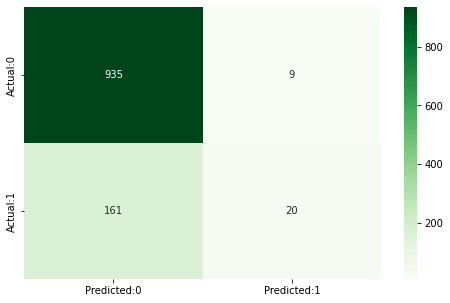

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       944
           1       0.69      0.11      0.19       181

    accuracy                           0.85      1125
   macro avg       0.77      0.55      0.55      1125
weighted avg       0.83      0.85      0.80      1125



In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
 
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

From here we conclude that our model performs quite well in predicting the patients that were not affected by Heart Disease. However for patients who were affected we need more amount of data to decide.